# Udacity ALX-T Project: Analysis of the European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This database comes from Kaggle and contains information on the top soccer league across 11 European countries from 2008 to 2016. There is information on the country, league, teams, players and matches.

### During the analysis of the data the following questions will be answered
> <ul>
    <li>Does average player overall rating vary across the different leagues in 2016?</li>
    <li>Is overall rating distributed differently for left-footed and right-footed players?</li>
    <li>Which teams have been the most dominant in their respective leagues?</li>
 </ul>

## Import Statements and Function Definitions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def properties(df):
    """Displays the head,shape,info, number of duplicate rows and number of null values in a dataframe
    
    Args:
        df(pandas.core.frame.DataFrame): Input DataFrame
    
    """
    print('HEAD')
    display(df.head())
    print('SHAPE')
    display(df.shape)
    print('INFO')
    display(df.info())
    print('NUMBER OF DUPLICATES')
    display(df.duplicated().sum())
    print('NULL VALUES')
    display(df.isna().sum())

In [3]:
def bar(df, x, y, order=None):
    """Constructs a bar plot using seaborn
    
    Args:
        df(pandas.core.frame.DataFrame): Input DataFrame
        x(str): Name of DataFrame column containing the x-axis values
        y(str): Name of DataFrame column containing the y-axis values
        order(list): Order of the categorical values. Has a default value of none if not specified
    
    """
    plt.figure(figsize=(15,8))
    sns.barplot(data=df, x=x, y=y, order=order)

In [4]:
def box(df, x, y, order=None):
    """Constructs a box plot using seaborn
    
    Args:
        df(pandas.core.frame.DataFrame): Input DataFrame
        x(str): Name of DataFrame column containing the x-axis values
        y(str): Name of DataFrame column containing the y-axis values
        order(list): Order of the categorical values. Has a default value of none if not specified
    
    """
    plt.figure(figsize=(15,8))
    sns.boxplot(data=df, x=x, y=y, order=order)

In [5]:
def ppg(results, limit=0):
    """Returns a DataFrame containing points per game information given the results and limit to game number
    
    Args:
        results(pandas.core.frame.DataFrame): Dataframe containing the match information
        limit(int): Minimum number of games played per team. Default value is zero if not specified
        
    Returns:
        df_ppg(pandas.core.frame.DataFrame): DataFrame containing the calculated points per game
    """
    total_points = results.groupby(['league_name','team_name'])['points'].sum()
    
    game_number = pd.Series([(results['team_name'] == t[1]).sum() for t in total_points.index])
    game_number.index = total_points.index
    
    if limit > 0:
        total_points = total_points[game_number > limit]
        game_number = game_number[game_number > limit]
    
    df_ppg = pd.DataFrame(total_points/game_number, columns=['ppg']).reset_index()
    return df_ppg

In [6]:
def set_size(w,h, ax=None):
    """Sets the width and height of a matplotlib plot
    
    Args:
        w(float): Width in inches
        h(float): Height in inches
        ax(matplotlib.axes._subplots.AxesSubplot): Axes to set size. Default value of None if not specified
    """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [7]:
def multi_bar(df_ppg, w, h):
    """Plots points per game info using bar plots for each league
    
    Args:
        df_ppg(pandas.core.frame.DataFrame): DataFrame containing the points per game information
        w(float): Width of plot in inches
        h(float): Height of plot in inches
    """
    leagues = df_ppg['league_name'].unique()
    plt.figure(figsize=(20,100))

    fig, ax = plt.subplots(len(leagues))

    for a,l in zip(ax,leagues):
        a.bar(data=df_ppg[df_ppg['league_name'] == l].sort_values(by='ppg'), height='ppg', x='team_name')
        a.set_title(l)
        set_size(w,h)
        for tick in a.get_xticklabels():
            tick.set_rotation(45)
    fig.tight_layout()

<a id='wrangling'></a>
## Data Wrangling

> In this section, all necessary files will be imported and its properties checked and assessed, cleaning and transformation will be done where necessary in preparation for the analysis

### General Properties

> The general properties of the Country, League, Match, Player, Player_Attributes, Team and Team_Attributes datasets will be checked.

#### Country Dataset

In [8]:
df_country = pd.read_csv('Database_Soccer/Country.csv')

In [9]:
properties(df_country)

HEAD


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


SHAPE


(11, 2)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


None

NUMBER OF DUPLICATES


0

NULL VALUES


id      0
name    0
dtype: int64

#### League Dataset

In [10]:
df_league = pd.read_csv('Database_Soccer/League.csv')

In [11]:
properties(df_league)

HEAD


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


SHAPE


(11, 3)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


None

NUMBER OF DUPLICATES


0

NULL VALUES


id            0
country_id    0
name          0
dtype: int64

#### Match Dataset

In [12]:
df_match = pd.read_csv('Database_Soccer/Match.csv')

In [13]:
properties(df_match)

HEAD


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


SHAPE


(25979, 115)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


None

NUMBER OF DUPLICATES


0

NULL VALUES


id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [14]:
#The match dataset has a lot of columns, we will use the below code to get a complete view of the null values
for i in df_match.isna().sum().index:
    print(i, ' - ', df_match.isna().sum().loc[i])

id  -  0
country_id  -  0
league_id  -  0
season  -  0
stage  -  0
date  -  0
match_api_id  -  0
home_team_api_id  -  0
away_team_api_id  -  0
home_team_goal  -  0
away_team_goal  -  0
home_player_X1  -  1821
home_player_X2  -  1821
home_player_X3  -  1832
home_player_X4  -  1832
home_player_X5  -  1832
home_player_X6  -  1832
home_player_X7  -  1832
home_player_X8  -  1832
home_player_X9  -  1832
home_player_X10  -  1832
home_player_X11  -  1832
away_player_X1  -  1832
away_player_X2  -  1832
away_player_X3  -  1832
away_player_X4  -  1832
away_player_X5  -  1832
away_player_X6  -  1832
away_player_X7  -  1832
away_player_X8  -  1832
away_player_X9  -  1833
away_player_X10  -  1833
away_player_X11  -  1839
home_player_Y1  -  1821
home_player_Y2  -  1821
home_player_Y3  -  1832
home_player_Y4  -  1832
home_player_Y5  -  1832
home_player_Y6  -  1832
home_player_Y7  -  1832
home_player_Y8  -  1832
home_player_Y9  -  1832
home_player_Y10  -  1832
home_player_Y11  -  1832
away_player_Y1  -

#### Team Dataset

In [15]:
df_team = pd.read_csv('Database_Soccer/Team.csv')

In [16]:
properties(df_team)

HEAD


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


SHAPE


(299, 5)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


None

NUMBER OF DUPLICATES


0

NULL VALUES


id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

#### Team Attributes Dataset

In [17]:
df_team_attributes = pd.read_csv('Database_Soccer/Team_Attributes.csv')

In [18]:
properties(df_team_attributes)

HEAD


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


SHAPE


(1458, 25)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass   

None

NUMBER OF DUPLICATES


0

NULL VALUES


id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

#### Player Dataset

In [19]:
df_player = pd.read_csv('Database_Soccer/Player.csv')

In [20]:
properties(df_player)

HEAD


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


SHAPE


(11060, 7)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


None

NUMBER OF DUPLICATES


0

NULL VALUES


id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

#### Player Attributes Dataset

In [21]:
df_player_attributes = pd.read_csv('Database_Soccer/Player_Attributes.csv')

In [22]:
properties(df_player_attributes)

HEAD


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


SHAPE


(183978, 42)

INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve       

None

NUMBER OF DUPLICATES


0

NULL VALUES


id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [23]:
# Checking the player_api_id column for duplicates to see the number of times players appear more than once
df_player_attributes.duplicated(subset='player_api_id').sum()

172918


### Data Cleaning

> In this section, the dataframes will be more rigorously reviewed and all missing and duplicated values will be dealt with, as well as ensuring the data is in the appropriate format and datatype for analysis.

#### Country data

> From what was observed in the general properties column, only the id column needs to be converted to a string datatype, as it won't be used for any calculations.

In [24]:
df_country.id = df_country.id.astype('str')

In [25]:
df_country.dtypes

id      object
name    object
dtype: object

#### League data

> The id column will be dropped since it is redundant and he country_id column is going to be converted to a string, as well as renaming the name column to league_name to avoid confusion when merging with the other datasets

In [26]:
df_league.drop(columns='id', inplace=True)

In [27]:
df_league.country_id = df_league.country_id.astype('str')

In [28]:
df_league.dtypes

country_id    object
name          object
dtype: object

In [29]:
df_league.rename(columns={'name':'league_name'}, inplace=True)

#### Match data

> There is much more to deal with in this dataset than the previous two. All missing values will be handled, as well as dropping of columns not necessary for analysis, and create a result column for the home and away side.

First, we start with dropping columns not necessary for the scope of this project. The columns country_id to away_player_11 are the only relevant columns.

In [30]:
df_match = df_match.loc[:, 'country_id':'away_player_11']

We create the home and away results by comparing the home_team_goal and away_team_goal columns.

In [31]:
df_match['result_home'] = pd.Series(['win' if x > y else 'draw' if x == y else 'lose' for x, y in df_match[['home_team_goal', 'away_team_goal']].to_numpy('int')])
df_match['result_away'] = pd.Series(['lose' if x > y else 'draw' if x == y else 'win' for x, y in df_match[['home_team_goal', 'away_team_goal']].to_numpy('int')])

The stage column will be renamed to matchday as it is a league and not a knockout tournament match data.

In [32]:
df_match.rename(columns={'stage':'matchday'}, inplace=True)

The missing values in the starting XI columns will be tentatively filled with 'missing'.

In [33]:
df_match.loc[:, 'home_player_X1':'away_player_11'] = df_match.loc[:, 'home_player_X1':'away_player_11'].fillna('missing')

In [34]:
df_match.loc[:, 'home_player_X1':'away_player_11'].tail()

,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
25974,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,...,563066.0,8800.0,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0
25975,1.0,3.0,5.0,7.0,2.0,4.0,6.0,8.0,5.0,4.0,...,114792.0,150007.0,178119.0,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0
25976,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,...,67349.0,202663.0,32597.0,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0
25977,1.0,2.0,4.0,6.0,8.0,3.0,7.0,5.0,3.0,5.0,...,121080.0,197757.0,260964.0,231614.0,113235.0,41116.0,462608.0,42262.0,92252.0,194532.0
25978,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,...,95216.0,172768.0,22834.0,458806.0,207234.0,25772.0,40274.0,34035.0,41726.0,527103.0


Upon closer inspection, the home_player_X1 to away_player_Y11 dataset don't contain relevant information and will be dropped.

In [35]:
to_drop = df_match.loc[:, 'home_player_X1':'away_player_Y11'].columns
df_match.drop(columns=to_drop, inplace=True)

The home_player_1 to away_player_11 columns will be reformatted to remove the decimal points and then converted to the string datatype. The goals and dates columns will be changed to integer and datetime format respectively.

In [36]:
df_match.loc[:, 'home_player_1':'away_player_11'] = df_match.loc[:, 'home_player_1':'away_player_11'].applymap(lambda x : str(int(x)) if x != 'missing' else x)

In [37]:
df_match = df_match.astype('str').astype({'home_team_goal':'int','away_team_goal':'int'})

In [38]:
df_match.date = pd.to_datetime(df_match.date)

In [39]:
df_match.dtypes

country_id                  object
league_id                   object
season                      object
matchday                    object
date                datetime64[ns]
match_api_id                object
home_team_api_id            object
away_team_api_id            object
home_team_goal               int32
away_team_goal               int32
home_player_1               object
home_player_2               object
home_player_3               object
home_player_4               object
home_player_5               object
home_player_6               object
home_player_7               object
home_player_8               object
home_player_9               object
home_player_10              object
home_player_11              object
away_player_1               object
away_player_2               object
away_player_3               object
away_player_4               object
away_player_5               object
away_player_6               object
away_player_7               object
away_player_8       

#### Team Data

> This dataset needs the datatype of some columns changed, and the missing team fifa api id values will be handld by first sourcing them from the team attributes dataset, then dropping those that are missing from both.

In [40]:
team_id = df_team[['team_fifa_api_id', 'team_api_id']].merge(df_team_attributes[['team_fifa_api_id', 'team_api_id']], on='team_api_id', how='inner', suffixes=('','_attributes')).drop_duplicates('team_api_id')

In [41]:
team_id.isna().sum()

team_fifa_api_id               0
team_api_id                    0
team_fifa_api_id_attributes    0
dtype: int64

In [42]:
df_team[df_team['team_fifa_api_id'].isna()]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
8,9,7947,NaN,FCV Dender EH,DEN
14,15,4049,NaN,Tubize,TUB
170,26561,6601,NaN,FC Volendam,VOL
204,34816,177361,NaN,Termalica Bruk-Bet Nieciecza,TBN
208,35286,7992,NaN,Trofense,TRO
213,35291,10213,NaN,Amadora,AMA
223,36248,9765,NaN,Portimonense,POR
225,36723,4064,NaN,Feirense,FEI
232,38789,6367,NaN,Uniao da Madeira,MAD
233,38791,188163,NaN,Tondela,TON


> The missing values in the team_fifa_api_id column must be dropped since we can't source it in the attributes dataset. Since the missing values are only in this column we can drop it instead. The id column is also redundant so itwill be dropped too.

In [43]:
df_team.drop(columns=['id', 'team_fifa_api_id'], inplace=True)

In [44]:
df_team = df_team.astype('str')
df_team.dtypes

team_api_id        object
team_long_name     object
team_short_name    object
dtype: object

#### Team Attributes Data
> The datatypes of some columns will be changed, as well as dropping the buildUpPlayDribbling column, that has too many null values, the redundant id column, and the team_fifa_api_id column.

In [45]:
df_team_attributes.drop(columns=['id','buildUpPlayDribbling','team_fifa_api_id'], inplace=True)

In [46]:
df_team_attributes['date'] = pd.to_datetime(df_team_attributes['date'])

In [47]:
df_team_attributes['team_api_id'] = df_team_attributes['team_api_id'].astype('str')

In [48]:
df_team_attributes.dtypes

team_api_id                               object
date                              datetime64[ns]
buildUpPlaySpeed                           int64
buildUpPlaySpeedClass                     object
buildUpPlayDribblingClass                 object
buildUpPlayPassing                         int64
buildUpPlayPassingClass                   object
buildUpPlayPositioningClass               object
chanceCreationPassing                      int64
chanceCreationPassingClass                object
chanceCreationCrossing                     int64
chanceCreationCrossingClass               object
chanceCreationShooting                     int64
chanceCreationShootingClass               object
chanceCreationPositioningClass            object
defencePressure                            int64
defencePressureClass                      object
defenceAggression                          int64
defenceAggressionClass                    object
defenceTeamWidth                           int64
defenceTeamWidthClas

#### Player data

> In this section, the redundant id column of the player dataset will be dropped, and also changing the datatypes of the birthday and player_api_id columns.

In [49]:
df_player.drop(columns='id',inplace=True)

In [50]:
df_player['birthday'] = pd.to_datetime(df_player['birthday'])

In [51]:
df_player[['player_api_id', 'player_fifa_api_id']] = df_player[['player_api_id', 'player_fifa_api_id']].astype('str')

In [52]:
df_player.dtypes

player_api_id                 object
player_name                   object
player_fifa_api_id            object
birthday              datetime64[ns]
height                       float64
weight                         int64
dtype: object

#### Player Attributes Data

> In this section, we will drop the redundant id column, fill the missing values of the categorical columns with the most occuring value, and fill the missing values of the numerical columns with the mean. We will also change the datatypes of the date, player_api_id and player_fifa_api_id columns

In [53]:
df_player_attributes.drop(columns='id', inplace=True)

In [54]:
df_player_attributes['date'] = pd.to_datetime(df_player_attributes['date'])

In [55]:
df_player_attributes[['player_api_id', 'player_fifa_api_id']] = df_player_attributes[['player_api_id', 'player_fifa_api_id']].astype('str')

In [56]:
x = df_player_attributes.loc[:, df_player_attributes.dtypes == 'float64']
x = x.fillna(x.mean())
df_player_attributes.loc[:, df_player_attributes.dtypes == 'float64'] = x

In [57]:
df_player_attributes[['preferred_foot','attacking_work_rate', 'defensive_work_rate']] = df_player_attributes[['preferred_foot','attacking_work_rate', 'defensive_work_rate']].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [58]:
df_player_attributes.isna().sum()

player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0


In [59]:
df_player_attributes.dtypes

player_fifa_api_id             object
player_api_id                  object
date                   datetime64[ns]
overall_rating                float64
potential                     float64
preferred_foot                 object
attacking_work_rate            object
defensive_work_rate            object
crossing                      float64
finishing                     float64
heading_accuracy              float64
short_passing                 float64
volleys                       float64
dribbling                     float64
curve                         float64
free_kick_accuracy            float64
long_passing                  float64
ball_control                  float64
acceleration                  float64
sprint_speed                  float64
agility                       float64
reactions                     float64
balance                       float64
shot_power                    float64
jumping                       float64
stamina                       float64
strength    

<a id='eda'></a>
## Exploratory Data Analysis

> Now that our data hs been trimmed and cleaned , exploratory data analysis can be carried out. We will compute statistics and create visualizations with the goal of addressing the research questions posed in the Introduction section.

### Does average player overall rating vary across different leagues in 2016?

To answer this question, we must be able to identify the league each player competes in, as well as the overall rating player attribute. We can source this data by making use of the cleaned match, league and player attributes dataframes.

In [60]:
df_league.head()

,country_id,league_name
0,1,Belgium Jupiler League
1,1729,England Premier League
2,4769,France Ligue 1
3,7809,Germany 1. Bundesliga
4,10257,Italy Serie A


In [61]:
df_match.head()

,country_id,league_id,season,matchday,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,result_home,result_away
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,...,missing,missing,missing,missing,missing,missing,missing,missing,draw,draw
1,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,...,missing,missing,missing,missing,missing,missing,missing,missing,draw,draw
2,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,...,missing,missing,missing,missing,missing,missing,missing,missing,lose,win
3,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,...,missing,missing,missing,missing,missing,missing,missing,missing,win,lose
4,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,...,missing,missing,missing,missing,missing,missing,missing,missing,lose,win


In [62]:
df_player_attributes.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


We first merge the match and league dataframes, and also filter the merged dataframe to include matches played only in 2016. The player attributes dataframe will also be filtered in the same fashion.

In [63]:
df_match_16 = df_match.merge(df_league, on='country_id').query('date.dt.year == 2016')

In [64]:
df_match_16.head()

,country_id,league_id,season,matchday,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,result_home,result_away,league_name
1600,1,1,2015/2016,22,2016-01-16,1979992,8342,274581,3,0,...,39625,409000,447455,293003,387723,658657,213487,win,lose,Belgium Jupiler League
1601,1,1,2015/2016,22,2016-01-17,1979993,9991,8635,2,0,...,309083,424128,282012,465960,missing,27696,46552,win,lose,Belgium Jupiler League
1602,1,1,2015/2016,22,2016-01-15,1979994,9987,10000,2,1,...,303179,431589,26916,38262,425988,26613,46335,win,lose,Belgium Jupiler League
1603,1,1,2015/2016,22,2016-01-17,1979995,8573,8475,3,3,...,257843,277325,213799,354494,512730,94008,277772,draw,draw,Belgium Jupiler League
1604,1,1,2015/2016,22,2016-01-17,1979996,9994,9985,0,2,...,424391,242719,166917,535938,659463,167057,365245,lose,win,Belgium Jupiler League


In [65]:
df_match_16['league_name'].value_counts()

Italy Serie A               211
Spain LIGA BBVA             211
England Premier League      190
France Ligue 1              190
Portugal Liga ZON Sagres    180
Germany 1. Bundesliga       153
Netherlands Eredivisie      153
Scotland Premier League     108
Switzerland Super League     90
Belgium Jupiler League       72
Poland Ekstraklasa           72
Name: league_name, dtype: int64

In [66]:
df_pa_16 = df_player_attributes.query('date.dt.year == 2016')

The next step is to change the format of the merged match and league dataframe to have access to the player's api id information as a column. Rows containing duplicates of the player id column will also be dropped.

In [67]:
player_league_info = pd.melt(df_match_16, id_vars=['league_name','date'], value_vars=df_match_16.loc[:, 'home_player_1':'away_player_11'].columns, var_name='starting_XI', value_name='player_api_id').drop_duplicates(subset='player_api_id')

In [68]:
player_league_info.head()

,league_name,date,starting_XI,player_api_id
0,Belgium Jupiler League,2016-01-16,home_player_1,34003
1,Belgium Jupiler League,2016-01-17,home_player_1,181069
2,Belgium Jupiler League,2016-01-15,home_player_1,195782
3,Belgium Jupiler League,2016-01-17,home_player_1,107806
4,Belgium Jupiler League,2016-01-17,home_player_1,37937


In [69]:
player_league_info.drop(columns=['date','starting_XI'], inplace=True)

The modified dataframes will now be merged on the layer api id column to obtain the league information of each player.

In [70]:
df_pa_l16 = df_pa_16.merge(player_league_info, on='player_api_id')

In [71]:
df_pa_l16.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,league_name
0,189615,155782,2016-04-21,74.0,76.0,left,high,medium,80.0,53.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,England Premier League
1,189615,155782,2016-04-07,74.0,76.0,left,high,medium,80.0,53.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,England Premier League
2,189615,155782,2016-01-07,73.0,75.0,left,high,medium,79.0,52.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,England Premier League
3,158138,27316,2016-04-28,77.0,77.0,left,medium,medium,77.0,72.0,...,81.0,28.0,34.0,35.0,15.0,12.0,7.0,16.0,15.0,Germany 1. Bundesliga
4,158138,27316,2016-02-25,77.0,77.0,left,medium,medium,77.0,72.0,...,81.0,28.0,34.0,35.0,15.0,12.0,7.0,16.0,15.0,Germany 1. Bundesliga


Let us inspect the dataframe for duplicated player api ids

In [72]:
df_pa_l16.duplicated(subset='player_api_id').sum()

5605

In [73]:
df_pa_l16[df_pa_l16.duplicated(subset='player_api_id')].head(10)

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,league_name
1,189615,155782,2016-04-07,74.0,76.0,left,high,medium,80.0,53.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,England Premier League
2,189615,155782,2016-01-07,73.0,75.0,left,high,medium,79.0,52.0,...,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,England Premier League
4,158138,27316,2016-02-25,77.0,77.0,left,medium,medium,77.0,72.0,...,81.0,28.0,34.0,35.0,15.0,12.0,7.0,16.0,15.0,Germany 1. Bundesliga
6,206592,528212,2016-01-28,48.0,57.0,right,medium,medium,12.0,15.0,...,41.0,15.0,15.0,12.0,53.0,41.0,39.0,51.0,53.0,Scotland Premier League
8,183853,40719,2016-04-14,70.0,72.0,left,medium,medium,64.0,67.0,...,67.0,36.0,31.0,37.0,14.0,13.0,9.0,15.0,10.0,Portugal Liga ZON Sagres
9,183853,40719,2016-01-21,70.0,72.0,left,medium,medium,64.0,67.0,...,67.0,36.0,31.0,37.0,14.0,13.0,9.0,15.0,10.0,Portugal Liga ZON Sagres
11,186561,75489,2016-03-03,82.0,85.0,right,high,high,75.0,75.0,...,75.0,62.0,74.0,68.0,6.0,11.0,5.0,10.0,8.0,England Premier League
12,186561,75489,2016-02-18,82.0,85.0,right,high,high,75.0,75.0,...,75.0,62.0,74.0,68.0,6.0,11.0,5.0,10.0,8.0,England Premier League
13,186561,75489,2016-01-28,82.0,85.0,right,high,high,75.0,75.0,...,75.0,62.0,74.0,68.0,6.0,11.0,5.0,10.0,8.0,England Premier League
15,192274,167027,2016-04-07,74.0,76.0,right,medium,medium,74.0,64.0,...,71.0,35.0,42.0,33.0,11.0,7.0,6.0,16.0,7.0,France Ligue 1


We will drop the duplicates, keeping only the first. Create a mean ratings by league series, and also visualize the variation using bar and box plots.

In [74]:
df_pa_l16.drop_duplicates(subset='player_api_id', inplace=True)

In [75]:
df_pa_l16.league_name.value_counts()

Italy Serie A               442
France Ligue 1              370
England Premier League      364
Spain LIGA BBVA             343
Portugal Liga ZON Sagres    339
Germany 1. Bundesliga       331
Belgium Jupiler League      274
Netherlands Eredivisie      266
Poland Ekstraklasa          265
Scotland Premier League     233
Switzerland Super League    150
Name: league_name, dtype: int64

In [76]:
mean_ratings = df_pa_l16.groupby('league_name')['overall_rating'].mean().sort_values()
mean_ratings

league_name
Scotland Premier League     62.626609
Switzerland Super League    63.726667
Poland Ekstraklasa          64.498113
Belgium Jupiler League      68.638686
Netherlands Eredivisie      69.169173
Portugal Liga ZON Sagres    70.345133
France Ligue 1              71.713514
Italy Serie A               74.065611
Germany 1. Bundesliga       74.731118
Spain LIGA BBVA             75.413994
England Premier League      75.703297
Name: overall_rating, dtype: float64

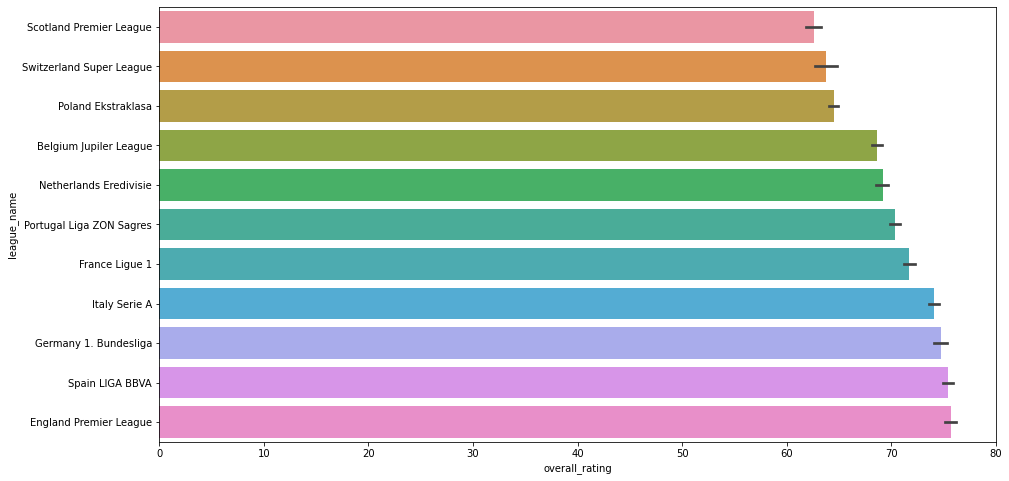

In [77]:
bar(df_pa_l16, 'overall_rating', 'league_name', mean_ratings.index)

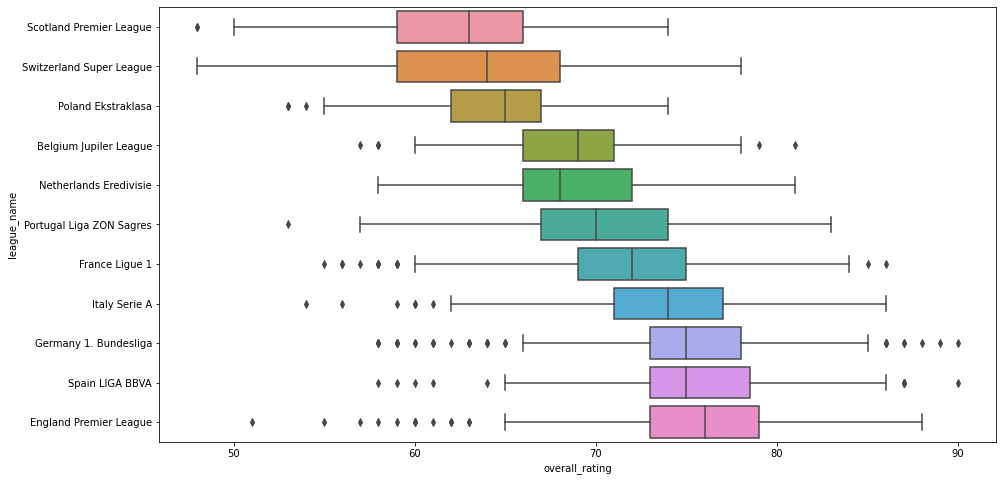

In [78]:
box(df_pa_l16, 'overall_rating', 'league_name', mean_ratings.index)

From the above visualizations we can see that the leagues in England, Spain, Germany, Italy and France, in that order, have the highest rated players on average. England and Germany have the most number of outliers in the top 5 leagues. 

### Is overall rating distributed differently for left-footed and right-footed players?
> To answer this question the player attributes dataframe will be sufficient

In [79]:
df_player_attributes.preferred_foot.value_counts()

right    139245
left      44733
Name: preferred_foot, dtype: int64

There is a much higher proportion of right footed players, about triple that of left footed players.

In [80]:
df_player_attributes.groupby('preferred_foot')['overall_rating'].mean()

preferred_foot
left     68.626182
right    68.591609
Name: overall_rating, dtype: float64

In [81]:
df_player_attributes.groupby('preferred_foot')['overall_rating'].median()

preferred_foot
left     69.0
right    69.0
Name: overall_rating, dtype: float64

In [82]:
df_player_attributes.groupby('preferred_foot')['overall_rating'].std()

preferred_foot
left     6.680060
right    7.132437
Name: overall_rating, dtype: float64

The mean and median when rounded to the first decimal place are equal, but the standard deviation of the right footed overall rating data is higher as there are greater number of right footed players over the range of values. There is no clear indication that right footed players are better footballers than left footed players and vice versa. The below vsualizations illustrate that point.

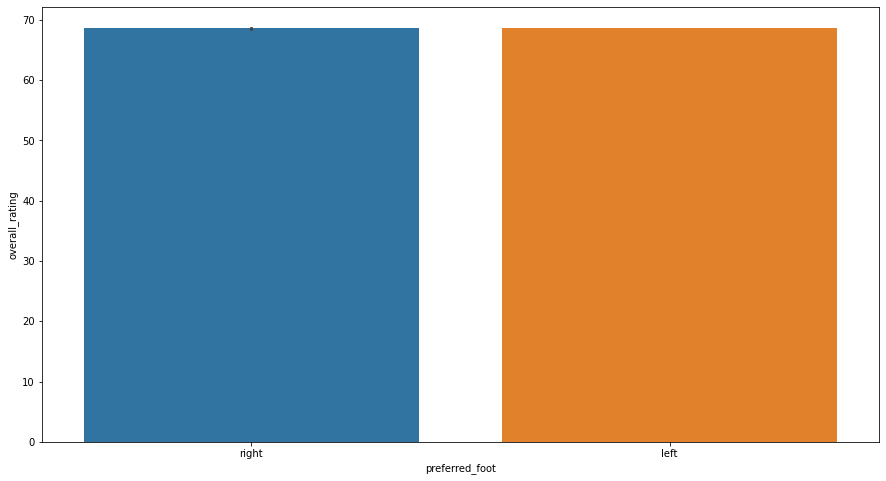

In [83]:
bar(df_player_attributes, 'preferred_foot', 'overall_rating')

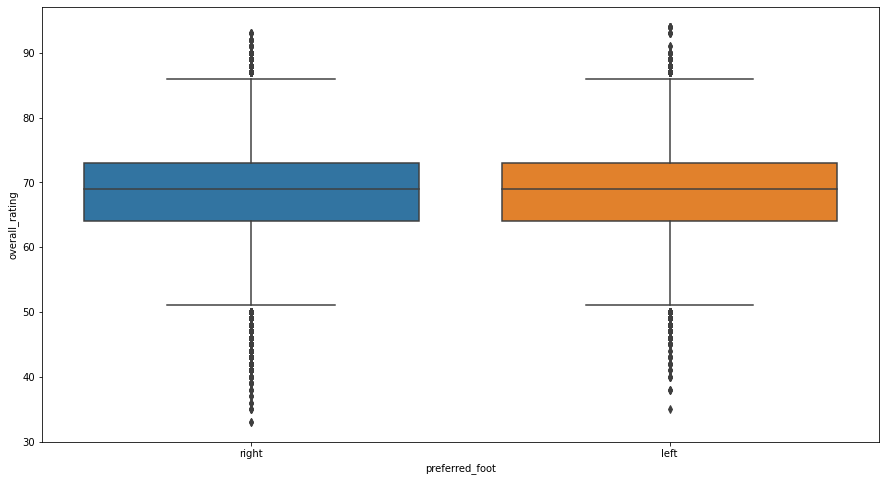

In [84]:
box(df_player_attributes, 'preferred_foot', 'overall_rating')

### Which teams have been the most dominant in their respective leagues?

> The match and team dataframes are required to get the relevant data to answer this question. We will first change the shape of the match dataframe so it can be more easily merged with the team dataframe.

In [85]:
initial = pd.melt(df_match, id_vars=['season','country_id','date','match_api_id','result_home','result_away'], value_vars=['home_team_api_id','away_team_api_id'], value_name='team_api_id')

In [86]:
team_results = pd.melt(initial, id_vars=['season','country_id','date','match_api_id','team_api_id','variable'], value_vars=['result_home','result_away'], var_name='var', value_name='result')

In [87]:
team_results.head()

,season,country_id,date,match_api_id,team_api_id,variable,var,result
0,2008/2009,1,2008-08-17,492473,9987,home_team_api_id,result_home,draw
1,2008/2009,1,2008-08-16,492474,10000,home_team_api_id,result_home,draw
2,2008/2009,1,2008-08-16,492475,9984,home_team_api_id,result_home,lose
3,2008/2009,1,2008-08-17,492476,9991,home_team_api_id,result_home,win
4,2008/2009,1,2008-08-16,492477,7947,home_team_api_id,result_home,lose


There are erroneous extra rows that were introduced from unpivoting the api_id and result columns for the home and away sides. To remove them we filter by ensuring a row contains the home_team_api_id and result_home values and vice versa for away results.

In [88]:
team_results = team_results.sort_values(by='date')[team_results['variable'].apply(lambda x: x[:4]) == team_results['var'].apply(lambda x: x[-4:])].reset_index(drop=True)

C:\Users\NASIRI~1\AppData\Local\Temp/ipykernel_9912/834119507.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  team_results = team_results.sort_values(by='date')[team_results['variable'].apply(lambda x: x[:4]) == team_results['var'].apply(lambda x: x[-4:])].reset_index(drop=True)


In [89]:
team_results.drop(columns=['variable','var'],inplace=True)

The data will now be merged with the team data, and a column containing the points won for each result will be created.

In [90]:
team_results = team_results.merge(df_team, on='team_api_id').merge(df_league, on='country_id')

In [91]:
team_results.head()

,season,country_id,date,match_api_id,team_api_id,result,team_long_name,team_short_name,league_name
0,2008/2009,24558,2008-07-18,486263,10192,lose,BSC Young Boys,YB,Switzerland Super League
1,2008/2009,24558,2008-07-24,486270,10192,lose,BSC Young Boys,YB,Switzerland Super League
2,2008/2009,24558,2008-07-27,486275,10192,draw,BSC Young Boys,YB,Switzerland Super League
3,2008/2009,24558,2008-08-03,486284,10192,lose,BSC Young Boys,YB,Switzerland Super League
4,2008/2009,24558,2008-08-10,486289,10192,win,BSC Young Boys,YB,Switzerland Super League


In [92]:
team_results.drop(columns='team_short_name', inplace=True)
team_results.rename(columns={'team_long_name':'team_name'}, inplace=True)

In [93]:
team_results['points'] = pd.Series([3 if x == 'win' else 1 if x == 'draw' else 0 for x in team_results['result']])

In [94]:
team_results.head()

,season,country_id,date,match_api_id,team_api_id,result,team_name,league_name,points
0,2008/2009,24558,2008-07-18,486263,10192,lose,BSC Young Boys,Switzerland Super League,0
1,2008/2009,24558,2008-07-24,486270,10192,lose,BSC Young Boys,Switzerland Super League,0
2,2008/2009,24558,2008-07-27,486275,10192,draw,BSC Young Boys,Switzerland Super League,1
3,2008/2009,24558,2008-08-03,486284,10192,lose,BSC Young Boys,Switzerland Super League,0
4,2008/2009,24558,2008-08-10,486289,10192,win,BSC Young Boys,Switzerland Super League,3


#### From 2008 - 2016

> The statistic we will use to make the comparison will be points per game. To ensure accurate comparison, only teams that have played more than 300 matches will be considered.

In [95]:
points_per_game = ppg(team_results, 300)

In [96]:
points_per_game.head()

,league_name,team_name,ppg
0,England Premier League,Arsenal,1.917763
1,England Premier League,Aston Villa,1.138158
2,England Premier League,Chelsea,1.967105
3,England Premier League,Everton,1.523026
4,England Premier League,Liverpool,1.730263


We will make use of bar plots to make the comparison

<Figure size 1440x7200 with 0 Axes>

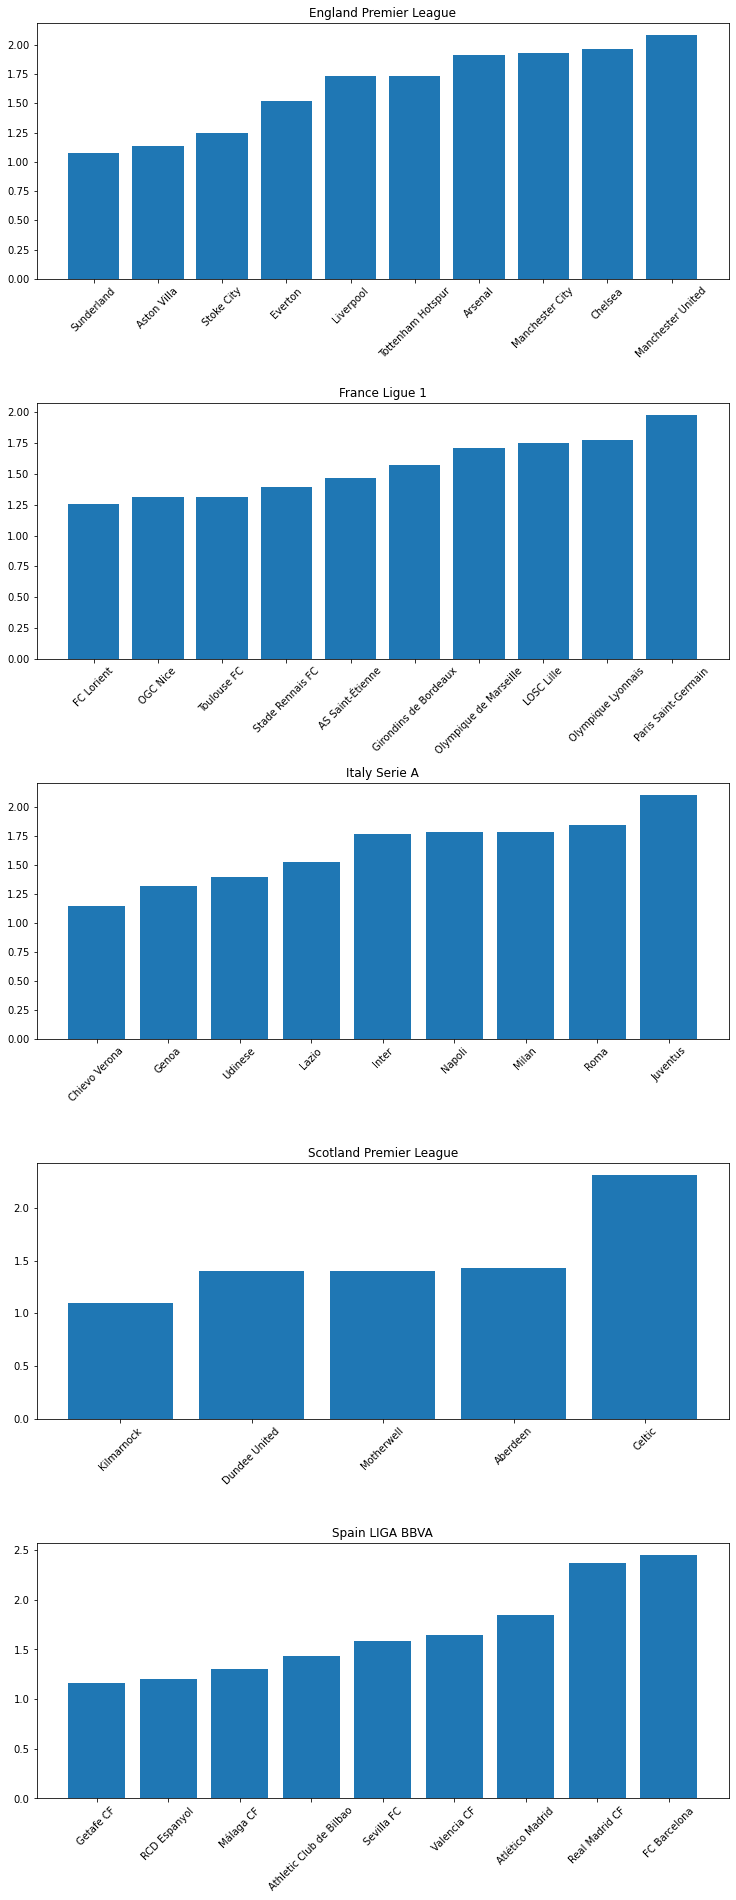

In [97]:
multi_bar(points_per_game, 8, 20)

For the 5 leagues that satisfied the 300 games criterion, the most dominant team from 2008-2016 are Manchester United, FC Barcelona, Paris Saint Germain, Juventus and Celtic.

#### For the 2015/2016 season

> We follow the same procedure as before after filtering the team results dataframe for matches played in the 2015/2016 season.

In [98]:
team_results_16 = team_results[team_results['season'] == '2015/2016']
points_per_game_16 = ppg(team_results_16)

<Figure size 1440x7200 with 0 Axes>

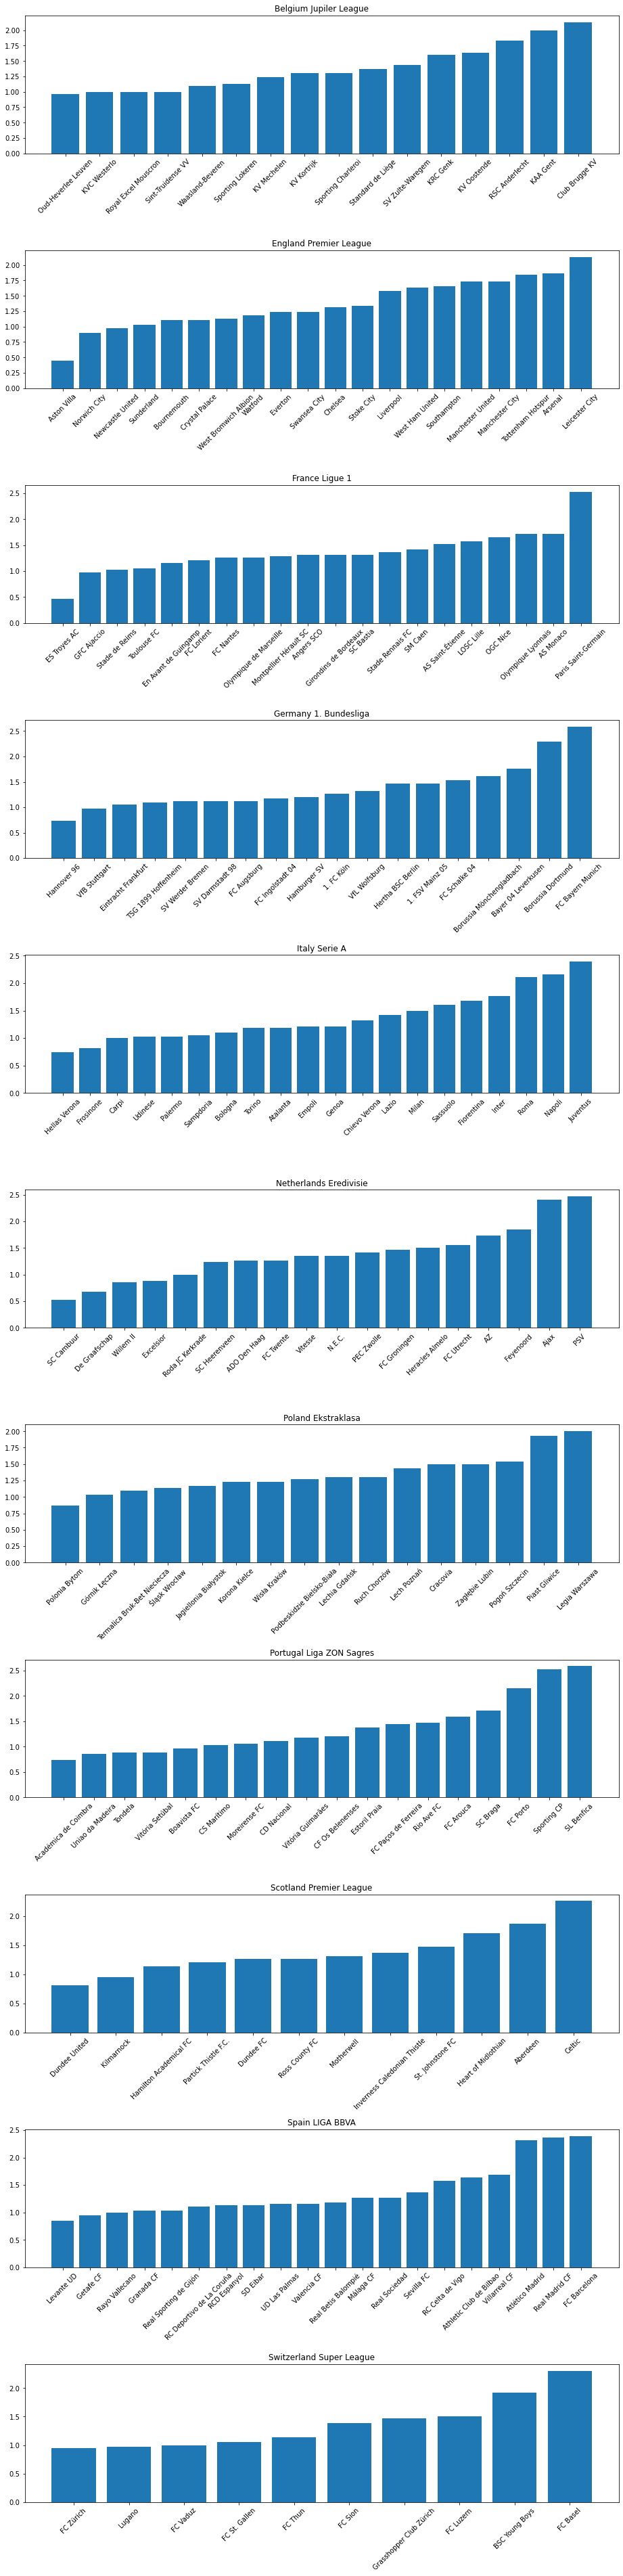

In [99]:
multi_bar(points_per_game_16, 10, 40)

Of the teams that passed the 300 game criterion from 2008/2016, only Celtic and FC Barcelona retained dominance in 2016.

<a id='conclusions'></a>
## Conclusions

 <ul>
    <li>Does average player overall rating vary across the different leagues in 2016? The results from the EDA suggest a variation in the average player overall rating across the top European leagues in 2016. The English, Spanish, German, Italian and French leagues, in that order, have the highest average player rating.</li>
    <li>Is overall rating distributed differently for left-footed and right-footed players? The results of the EDA does not suggest any significant difference in the overall rating of left-footed and right-footed players on average. There is a much higher number of right-footed players and the distrubition of the overall rating is slightler wider, but the centers of location are about equal.</li>
    <li>Which teams have been the most dominant in their respective leagues? There is a change in the dominance of teams across the 8 year match history and results from the most current season alone. FC Barcelona and Celtic are the teams that have most consistently dominated their league across the two time periods </li>

</ul>

## Limitations

<ul>
    <li>Presence of columns with unclear use reduces the breadth of potential questions asked.</li>
    <li>Columns with a high proportion of missing values that had to be discarded reduced quality of analysis.</li>
</ul>

## References

<ul>
    <li>StackOverflow</li>
    <li>GeeksForGeeks</li>
    <li>Python Documentation</li>
</ul>